- 4.1 NumPy `ndarray` objects:
    - Create arrays:
        - `np.array()` copies, `np.asarray()` does not copy if input already `ndarray`;
        - `np.arange()` like Python range();
        - `np.ones()`, `np.zeros()`, `np.empty()`, `np.full()`: Specify shape;
            - Warning: Use `np.empty()` only when initializing afterwards before use for sure;
        - `np.ones_like()`, `np.zeros_like()`, `np.empty_like()`, `np.full_like()`: Specify eg. for shape;
        - `np.eye()`, `np.identity()`: Square NxN identity matrix.
    - A slice of a NumPy array is a view (and can be made a copy with `.copy()`); 
        - whereas A slice of a Python list is a copy;
    - NumPy 2D or higher-D arrays can be indexed using 1 `[]` with index vals separated by comma inside; 
        - whereas Python nested lists have to be indexed with multiple full brackets `[]`.
    - Boolean indexing
        - `new_val = data[mask]` creates a copy of data where mask is True, and labels the new copy new_val;
        - `data[mask] = some_val` assigns some_val to elements of data where mask is True.
    - Fancy Indexing with Integer Arrays
        - `new_val = data[int_arr]` creates a copy of indexed data elements, and labels the new copy new_val;
        - `data[int_arr] = some_val` assigns some_val to indexed data elements.
    - Transpose an array with `arr.T`, swap axes with `arr.swapaxes(i, j)`.
- 4.2 Pseudorandom Number Generator
    - `rng = np.random.default_rng(seed=12345)`    # There are ~40 different distributions.
    - `data = rng.standard_normal((3, 4))`
- 4.3 Universal Functions or Ufuncs: Fast Element-Wise Array Funcs
    - Unary vs binary ufuncs;
    - Returning multiple arrays, e.g. `np.modf`;
    - Optional argument `out=`.
- 4.4 Array-Oriented Programming
    - Array conditional logic with `np.where()`;
    - Math and stat methods `.mean(), .std(), .min(), .cumsum(), np.median()`;
    - Boolean-array methods `.sum(), .any(), .all()`;
    - Sort in place with `.sort()`, similar to Python list function `.sort()`;
    - Get a sorted copy with `np.sort()`, similar to Python function `sorted()`;
    - Sort a table with 1 or more cols with pandas.
- 4.5 Saving NumPy binary file formats (Prefer pandas, etc, for loading text :
    - Workhorse funcs: `np.save()` and `np.load()`, file extension `.npy`;
    - Save multiplce uncompressed arrays with `np.savez()`, file extension `.npz`;
    - Save multiplce compressed arrays with `np.savez_compressed()`, file extension `.npz`.
- 4.6 Common funcs in `np.linalg`:
    - `diag, dot, trace, det, eig, inv, pinv, qr, svd, solve, lstsq`
- 4.7 Simulating random walks with NumPy:
    - Simulate multiple random walks:
        - `draws = rng.integers(0, 2, size=(n_walks, n_steps))`    # 0 or 1; each row is a walk
        - `steps = np.where(draws > 0, 1, -1)`    # keep the 1's and change the 0's to -1's
        - `walks = steps.cumsum(axis=1)`    # Each row is a walk
    - Extract stat metrics:
        - `hits30 = (np.abs(walks) >= 30).any(axis=1)`
        - `hits30.sum()`    # Count of walks hitting 30
        - `crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)`
        - `crossing_times.mean()`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.__version__

'1.23.5'

In [3]:
%precision 4
np.set_printoptions(precision=4)

What's in NumPy:
1. ndarray,
2. ufuncs,
3. utility for arrays in files and arrays in memory, 
4. linear algebra, random number gen., and FFT capbilities,
5. well-documented C API.

In [2]:
N = 10_000_000
arr_10m = np.arange(N)
list_10m = list(range(N))

In [3]:
%timeit arr_10m * 2

11.3 ms ± 128 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
%timeit [x * 2 for x in list_10m]

519 ms ± 9.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
519 / 11.3

45.9292

Almost 50x speed-up is impressive!

### 4.1 NumPy `ndarray` Objects

#### In this book, 'NumPy array', 'array', 'ndarray' all refer to the same `ndarray` obj.

In [8]:
data = np.array([[1.5, -0.1, 3],
                 [0, -3, 6.5]])
data

array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])

Element-wise math.

In [9]:
data * 10

array([[ 15.,  -1.,  30.],
       [  0., -30.,  65.]])

In [10]:
data + data

array([[ 3. , -0.2,  6. ],
       [ 0. , -6. , 13. ]])

In [11]:
data.shape

(2, 3)

In [12]:
data.dtype

dtype('float64')

In [13]:
type(data)

numpy.ndarray

In [14]:
data.ndim, data.size

(2, 6)

#### Creating `ndarrays`

- `np.array()` copies;
- `np.asarray()` does not copy if input already `ndarray`;
- `np.arange()` like Python range();
- `np.ones()`, `np.zeros()`, `np.empty()`, `np.full()`: Specify shape;
- `np.ones_like()`, `np.zeros_like()`, `np.empty_like()`, `np.full_like()`: Specify eg. for shape;
- `np.eye()`, `np.identity()`: Square NxN identity matrix.

In [15]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)    # Easiest way
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [16]:
type(arr1), arr1.ndim, arr1.shape, arr1.dtype

(numpy.ndarray, 1, (5,), dtype('float64'))

In [17]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [18]:
type(arr2), arr2.ndim, arr2.shape, arr2.dtype

(numpy.ndarray, 2, (2, 4), dtype('int32'))

In [19]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [21]:
np.empty((3, 6))    # Warning: Uninitialized! Can be non-zeros and have 'garbage' vals!

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [22]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

#### `dtype` or Data Types for `ndarray`

In [23]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr1

array([1., 2., 3.])

In [24]:
arr1.dtype

dtype('float64')

In [25]:
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr2

array([1, 2, 3])

In [26]:
arr2.dtype

dtype('int32')

In [27]:
arr1_float = arr1.astype(np.float32)
arr1_float

array([1., 2., 3.], dtype=float32)

In [28]:
arr1.dtype, arr1_float.dtype

(dtype('float64'), dtype('float32'))

In [29]:
arr3 = np.array([3.7, -1.2, 0.4, 12.9, -6.8])
arr3

array([ 3.7, -1.2,  0.4, 12.9, -6.8])

In [30]:
arr3.astype(np.int32)    # Note truncation, not round off

array([ 3, -1,  0, 12, -6])

In [31]:
# Warning np.string_ is fixed size and may truncate without warning
num_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
num_strings

array([b'1.25', b'-9.6', b'42'], dtype='|S4')

In [32]:
num_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [33]:
int_arr = np.arange(10)
int_arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
int_arr.astype(arr3.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [35]:
np.zeros(8, dtype='u4')    # Shorthand for uint32

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

#### Element-wise Arithmetic with NumPy Arrays

In [36]:
arr = np.arange(1, 7, 1, dtype=float).reshape((2, 3))
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [37]:
arr + arr

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]])

In [38]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [39]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [40]:
arr / arr

array([[1., 1., 1.],
       [1., 1., 1.]])

In [41]:
1 / arr

array([[1.    , 0.5   , 0.3333],
       [0.25  , 0.2   , 0.1667]])

In [42]:
arr ** 2

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [43]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [44]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

#### Basic Indexing and Slicing

In [45]:
arr1 = np.arange(10)    # 1d arrays on the surface look similar to Python lists
arr1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
arr1[5]

5

In [47]:
arr1[5:8]

array([5, 6, 7])

In [48]:
arr1[5:8] = 12
arr1

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [49]:
# pylist1 = [n for n in range(10)]
pylist1 = list(range(10))
pylist1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [50]:
pyslice1 = pylist1[5:8]
pyslice1

[5, 6, 7]

In [51]:
pyslice1[0] = 99
pyslice1[1] = 98
pyslice1[2] = 97
pyslice1

[99, 98, 97]

In [52]:
pylist1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [53]:
arr1_slice = arr1[5:8]
arr1_slice

array([12, 12, 12])

In [54]:
arr1_slice[1] = 12345
arr1_slice

array([   12, 12345,    12])

In [55]:
arr1

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [56]:
arr1_slice[:] = 64
arr1_slice

array([64, 64, 64])

In [57]:
arr1

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [58]:
arr1_slice_copy = arr1[5:8].copy()
arr1_slice_copy

array([64, 64, 64])

In [59]:
arr1_slice_copy[:] = 88
arr1_slice_copy

array([88, 88, 88])

In [60]:
arr1

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

Observations:
- Python slice of a list is a copy;
- NumPy slice of an array is a view, not a copy; 
- NumPy slice _with_ `.copy()` is a copy, not a view.

In [61]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [62]:
arr2d.ndim

2

In [63]:
arr2d.shape

(3, 3)

In [64]:
arr2d[2]

array([7, 8, 9])

In [65]:
arr2d[0][2]

3

In [66]:
arr2d[0, 2]

3

In [67]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [68]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [69]:
arr3d[1]

array([[ 7,  8,  9],
       [10, 11, 12]])

In [70]:
arr3d_slice_copy = arr3d[0].copy()
arr3d_slice_copy

array([[1, 2, 3],
       [4, 5, 6]])

In [71]:
arr3d[0] = 0
arr3d[1] = 1
arr3d

array([[[0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1]]])

In [72]:
arr3d_slice_copy

array([[1, 2, 3],
       [4, 5, 6]])

In [73]:
arr3d[1] = arr3d_slice_copy
arr3d

array([[[0, 0, 0],
        [0, 0, 0]],

       [[1, 2, 3],
        [4, 5, 6]]])

In [74]:
arr3d[1][0]

array([1, 2, 3])

In [75]:
arr3d[1, 0]

array([1, 2, 3])

In [76]:
x = arr3d[1]
x

array([[1, 2, 3],
       [4, 5, 6]])

In [77]:
x[0]    # Same as arr3d[1, 0] and arr3d[1][0]

array([1, 2, 3])

- 2D, 3D, and more-D indexing syntax of NumPy arrays won't work with ergular Python lists or other data structures;
- Python nested lists have to be indexed layer by layer, each with full brackets `[]`.

In [78]:
list3d = [[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]]
list3d

[[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]]

In [79]:
len(list3d)

2

In [80]:
list3d[0]

[[1, 2, 3], [4, 5, 6]]

In [81]:
list3d[1]

[[7, 8, 9], [10, 11, 12]]

In [80]:
# Causes IndexError: list index out of range
#list3d[2]

In [81]:
# Causes TypeError: list indices must be integers or slices, not tuple
#list3d[0, 0]

In [82]:
list3d[0][0]

[1, 2, 3]

In [83]:
list3d[0][0][0]

1

#### Indexing with Slices

In [84]:
arr = np.arange(9).reshape((3, 3))
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [85]:
arr[:2]

array([[0, 1, 2],
       [3, 4, 5]])

In [86]:
arr[:2, 1:]

array([[1, 2],
       [4, 5]])

In [87]:
arr[1, :2]    # Axis 0 reduced

array([3, 4])

In [88]:
arr[:2, 2]    # Axis 1 reduced

array([2, 5])

In [89]:
arr[2:, 2:]    # Both axises retained

array([[8]])

In [90]:
arr[:, :1]

array([[0],
       [3],
       [6]])

In [91]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [92]:
arr[:2, 1:]

array([[1, 2],
       [4, 5]])

In [93]:
arr[2]

array([6, 7, 8])

In [94]:
arr[2, :]

array([6, 7, 8])

In [95]:
arr[2:, :]    # Different from the line above

array([[6, 7, 8]])

In [96]:
arr[2, :].ndim, arr[2, :].shape

(1, (3,))

In [97]:
arr[2:, :].ndim, arr[2:, :].shape

(2, (1, 3))

In [98]:
arr[:, :2]

array([[0, 1],
       [3, 4],
       [6, 7]])

In [99]:
arr[1, :2]

array([3, 4])

In [100]:
arr[1:2, :2]    # Different from the line above

array([[3, 4]])

In [106]:
# Q: Is this OK? No, deprecated for "ragged nested seq.".
# Causes VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (...) is deprecated...
#np.array([[1, 2, 3], [4, 5]])

C:\Users\xiuwe\AppData\Local\Temp\ipykernel_11480\261274174.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([[1, 2, 3], [4, 5]])


array([list([1, 2, 3]), list([4, 5])], dtype=object)

In [101]:
z = np.array([[1, 2, 3], [4, 5]], dtype=object)
z

array([list([1, 2, 3]), list([4, 5])], dtype=object)

In [103]:
z.shape

(2,)

In [104]:
z[0]

[1, 2, 3]

In [105]:
z[1]

[4, 5]

In [106]:
np.array([1, 2, 3])

array([1, 2, 3])

In [107]:
np.array([[1, 2, 3], [4, 5, 6]])

array([[1, 2, 3],
       [4, 5, 6]])

#### Boolean Indexing

- `new_val = data[mask]` creates a copy of data where mask is True, and labels the new copy new_val;
- `data[mask] = some_val` assigns some_val to elements of data where mask is True.

In [108]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [109]:
data = np.arange(14).reshape((7, 2))
data

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13]])

In [110]:
names == 'Bob'    # Results in a Boolean array

array([ True, False, False,  True, False, False, False])

In [111]:
data[_]    # Index data with the above Boolean array

array([[0, 1],
       [6, 7]])

In [112]:
data[__, 1:]    # Mix the above above Boolean array with slicing

array([[1],
       [7]])

In [113]:
data[___, 1]

array([1, 7])

In [114]:
data[~(names == 'Bob')]

array([[ 2,  3],
       [ 4,  5],
       [ 8,  9],
       [10, 11],
       [12, 13]])

In [115]:
data[(names != 'Bob')]

array([[ 2,  3],
       [ 4,  5],
       [ 8,  9],
       [10, 11],
       [12, 13]])

In [116]:
mask = (names == 'Bob')
mask

array([ True, False, False,  True, False, False, False])

In [117]:
data[mask]

array([[0, 1],
       [6, 7]])

In [118]:
data[~mask]

array([[ 2,  3],
       [ 4,  5],
       [ 8,  9],
       [10, 11],
       [12, 13]])

In [119]:
mask2 = (mask | (names == 'Will'))    # Bit-wise or op `|`, not logical or op `or`
mask2

array([ True, False,  True,  True,  True, False, False])

In [120]:
data[mask2]

array([[0, 1],
       [4, 5],
       [6, 7],
       [8, 9]])

In [121]:
data

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13]])

In [122]:
data < 6

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [False, False],
       [False, False],
       [False, False],
       [False, False]])

In [123]:
data[data < 6] = 0
data

array([[ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13]])

In [124]:
data[names != 'Joe'] = 77
data

array([[77, 77],
       [ 0,  0],
       [77, 77],
       [77, 77],
       [77, 77],
       [10, 11],
       [12, 13]])

In [125]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [126]:
data = np.arange(14).reshape((7, 2))
data

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13]])

In [127]:
mask

array([ True, False, False,  True, False, False, False])

In [128]:
new_val = data[mask]
new_val

array([[0, 1],
       [6, 7]])

In [131]:
type(new_val)

int

In [129]:
new_val = -1
new_val

-1

In [130]:
data

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13]])

In [132]:
data[mask] = -1
data

array([[-1, -1],
       [ 2,  3],
       [ 4,  5],
       [-1, -1],
       [ 8,  9],
       [10, 11],
       [12, 13]])

#### Fancy Indexing with Integer Arrays

- `new_val = data[int_arr]` creates a copy of indexed data elements, and labels the new copy new_val;
- `data[int_arr] = some_val` assigns some_val to indexed data elements.

In [133]:
arr = np.zeros((8, 4))
arr

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [134]:
for i in range(8):
    arr[i] = i
    
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [135]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [136]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [137]:
arr1 = np.arange(32).reshape((8, 4))
arr1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [138]:
arr1[[1, 5, 7, 2], [0, 3, 1, 2]]    # Passing multiple index arrays

array([ 4, 23, 29, 10])

In [139]:
arr1[1, 0], arr1[5, 3], arr1[7, 1], arr1[2, 2]

(4, 23, 29, 10)

In [140]:
arr1[[1, 5, 7, 2]][:, [0, 3, 1, 2]]    # Selecting a rectanglular region and reordering

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [141]:
fancy_copy = arr1[[1, 5, 7, 2], [0, 3, 1, 2]]
fancy_copy

array([ 4, 23, 29, 10])

In [142]:
fancy_copy[:] = -1
fancy_copy

array([-1, -1, -1, -1])

In [143]:
arr1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [144]:
arr1[[1, 5, 7, 2], [0, 3, 1, 2]] = -1
arr1

array([[ 0,  1,  2,  3],
       [-1,  5,  6,  7],
       [ 8,  9, -1, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, -1],
       [24, 25, 26, 27],
       [28, -1, 30, 31]])

#### Transposing Arrays and Swapping Axes

In [145]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [146]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [147]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [148]:
arr1 = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])
arr1

array([[ 0,  1,  0],
       [ 1,  2, -2],
       [ 6,  3,  2],
       [-1,  0, -1],
       [ 1,  0,  1]])

In [149]:
arr1.T

array([[ 0,  1,  6, -1,  1],
       [ 1,  2,  3,  0,  0],
       [ 0, -2,  2, -1,  1]])

In [150]:
np.dot(arr1.T, arr1)

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

In [151]:
arr1.T @ arr1    # infix operator @ for matrix mul.

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

In [152]:
arr1

array([[ 0,  1,  0],
       [ 1,  2, -2],
       [ 6,  3,  2],
       [-1,  0, -1],
       [ 1,  0,  1]])

In [153]:
arr1.swapaxes(0, 1)    # Simple transposing with .T is a special case of swapping axes

array([[ 0,  1,  6, -1,  1],
       [ 1,  2,  3,  0,  0],
       [ 0, -2,  2, -1,  1]])

In [154]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [155]:
arr3d.ndim

3

In [156]:
arr3d.shape

(2, 2, 3)

In [157]:
arr3d.swapaxes(0, 2)

array([[[ 1,  7],
        [ 4, 10]],

       [[ 2,  8],
        [ 5, 11]],

       [[ 3,  9],
        [ 6, 12]]])

In [158]:
_.shape

(3, 2, 2)

In [159]:
arr3d.reshape((3 * 2 * 2))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [160]:
_.reshape(3, 2, 2)

array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]]])

In [161]:
arr3d.swapaxes(0, 2) == arr3d.reshape((3 * 2 * 2)).reshape(3, 2, 2)

array([[[ True, False],
        [False, False]],

       [[False, False],
        [False, False]],

       [[False, False],
        [False,  True]]])

Q: How does .swapaxes() work exactly?

### 4.2 Pseudorandom Number Generator

In [3]:
np.random.standard_normal((3, 4))

array([[ 1.1666,  1.1579, -1.284 , -0.8529],
       [-0.7274,  1.4787,  0.7057,  2.0639],
       [ 1.1363, -0.381 , -0.4454,  0.3231]])

In [4]:
from random import normalvariate

In [5]:
N = 1_000_000

In [6]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

577 ms ± 8.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%timeit samples = np.random.standard_normal(N)

19.6 ms ± 417 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
577 / 19.6

29.4388

In [9]:
# 30x times faster is impressive!

In [10]:
rng = np.random.default_rng(seed=12345)

In [11]:
type(rng)

numpy.random._generator.Generator

In [12]:
data = rng.standard_normal((3, 4))
data

array([[-1.4238,  1.2637, -0.8707, -0.2592],
       [-0.0753, -0.7409, -1.3678,  0.6489],
       [ 0.3611, -1.9529,  2.3474,  0.9685]])

In [13]:
dir(rng)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_bit_generator',
 '_poisson_lam_max',
 'beta',
 'binomial',
 'bit_generator',
 'bytes',
 'chisquare',
 'choice',
 'dirichlet',
 'exponential',
 'f',
 'gamma',
 'geometric',
 'gumbel',
 'hypergeometric',
 'integers',
 'laplace',
 'logistic',
 'lognormal',
 'logseries',
 'multinomial',
 'multivariate_hypergeometric',
 'multivariate_normal',
 'negative_binomial',
 'noncentral_chisquare',
 'noncentral_f',
 'normal',
 'pareto',
 'permutation',
 'permuted',
 'poisson',
 'power',
 'random',
 'rayleigh',
 'shuffle',
 'standard_cauchy',
 'standard_exponential',
 'standard_gamma',
 'standard_normal',
 'standard_t',
 'triangular',
 'uniform'

In [14]:
len(_)

71

### 4.3 Universal Functions: Fast Element-Wise Array Functions

Unary ufuncs.

In [3]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
np.sqrt(arr)

array([0.    , 1.    , 1.4142, 1.7321, 2.    , 2.2361, 2.4495, 2.6458,
       2.8284, 3.    ])

In [5]:
# Causes TypeError: sqrt() got an unexpected keyword argument 'precision'
#np.sqrt(arr, precision=2)
# What is the right way to change the display precision in np + pd?

TypeError: sqrt() got an unexpected keyword argument 'precision'

In [5]:
np.exp(arr)

array([1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01,
       1.4841e+02, 4.0343e+02, 1.0966e+03, 2.9810e+03, 8.1031e+03])

In [6]:
len(dir(np))

599

599 is a big number!

Binary ufuncs.

In [7]:
rng = np.random.default_rng(seed=12345)

In [8]:
x = rng.standard_normal(8)
x

array([-1.4238,  1.2637, -0.8707, -0.2592, -0.0753, -0.7409, -1.3678,
        0.6489])

In [9]:
y = rng.standard_normal(8)
y

array([ 0.3611, -1.9529,  2.3474,  0.9685, -0.7594,  0.9022, -0.467 ,
       -0.0607])

In [10]:
greater = np.maximum(x, y)
greater

array([ 0.3611,  1.2637,  2.3474,  0.9685, -0.0753,  0.9022, -0.467 ,
        0.6489])

In [11]:
(greater >= x).all()

True

In [12]:
(greater >= y).all()

True

In [13]:
np.maximum?

Call signature:  np.maximum(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'maximum'>
File:            d:\python\envs\learn311\lib\site-packages\numpy\__init__.py
Docstring:      
maximum(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Element-wise maximum of array elements.

Compare two arrays and returns a new array containing the element-wise
maxima. If one of the elements being compared is a NaN, then that
element is returned. If both elements are NaNs then the first is
returned. The latter distinction is important for complex NaNs, which
are defined as at least one of the real or imaginary parts being a NaN.
The net effect is that NaNs are propagated.

Parameters
----------
x1, x2 : array_like
    The arrays holding the elements to be compared.
    If ``x1.shape != x2.shape``, they must be broadcastable to a common
    shape (which becomes the shape of the output).
out : ndarray, None, or tuple of n

In [14]:
greater == x

array([False,  True, False, False,  True, False, False,  True])

In [15]:
greater == y

array([ True, False,  True,  True, False,  True,  True, False])

In [16]:
x5 = x * 5
x5

array([-7.1191,  6.3186, -4.3533, -1.2959, -0.3767, -3.7044, -6.839 ,
        3.2445])

In [17]:
remainder, whole_part = np.modf(x5)

In [18]:
whole_part

array([-7.,  6., -4., -1., -0., -3., -6.,  3.])

In [19]:
remainder

array([-0.1191,  0.3186, -0.3533, -0.2959, -0.3767, -0.7044, -0.839 ,
        0.2445])

In [20]:
np.sign(whole_part) == np.sign(remainder)    # This holds excepts where whole_part==0

array([ True,  True,  True,  True, False,  True,  True,  True])

In [21]:
np.sign(whole_part)

array([-1.,  1., -1., -1.,  0., -1., -1.,  1.])

In [22]:
np.sign(remainder)

array([-1.,  1., -1., -1., -1., -1., -1.,  1.])

In [23]:
x5

array([-7.1191,  6.3186, -4.3533, -1.2959, -0.3767, -3.7044, -6.839 ,
        3.2445])

In [24]:
out = np.zeros_like(x5)
out.shape

(8,)

In [25]:
out

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
np.add(x5, 2)

array([-5.1191,  8.3186, -2.3533,  0.7041,  1.6233, -1.7044, -4.839 ,
        5.2445])

In [27]:
np.add(x5, 2, out=out)

array([-5.1191,  8.3186, -2.3533,  0.7041,  1.6233, -1.7044, -4.839 ,
        5.2445])

In [28]:
out

array([-5.1191,  8.3186, -2.3533,  0.7041,  1.6233, -1.7044, -4.839 ,
        5.2445])

### 4.4 Array-Oriented Programming

#### 4.4.1 Vectorization: Replacing explicit loops with array expressions.

In [4]:
pts = np.arange(-5, 5, 0.01)
pts

array([-5.0000e+00, -4.9900e+00, -4.9800e+00, -4.9700e+00, -4.9600e+00,
       -4.9500e+00, -4.9400e+00, -4.9300e+00, -4.9200e+00, -4.9100e+00,
       -4.9000e+00, -4.8900e+00, -4.8800e+00, -4.8700e+00, -4.8600e+00,
       -4.8500e+00, -4.8400e+00, -4.8300e+00, -4.8200e+00, -4.8100e+00,
       -4.8000e+00, -4.7900e+00, -4.7800e+00, -4.7700e+00, -4.7600e+00,
       -4.7500e+00, -4.7400e+00, -4.7300e+00, -4.7200e+00, -4.7100e+00,
       -4.7000e+00, -4.6900e+00, -4.6800e+00, -4.6700e+00, -4.6600e+00,
       -4.6500e+00, -4.6400e+00, -4.6300e+00, -4.6200e+00, -4.6100e+00,
       -4.6000e+00, -4.5900e+00, -4.5800e+00, -4.5700e+00, -4.5600e+00,
       -4.5500e+00, -4.5400e+00, -4.5300e+00, -4.5200e+00, -4.5100e+00,
       -4.5000e+00, -4.4900e+00, -4.4800e+00, -4.4700e+00, -4.4600e+00,
       -4.4500e+00, -4.4400e+00, -4.4300e+00, -4.4200e+00, -4.4100e+00,
       -4.4000e+00, -4.3900e+00, -4.3800e+00, -4.3700e+00, -4.3600e+00,
       -4.3500e+00, -4.3400e+00, -4.3300e+00, -4.3200e+00, -4.31

In [5]:
xs, ys = np.meshgrid(pts, pts)

In [6]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [7]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [8]:
zs = np.sqrt(xs ** 2 + ys ** 2)
zs

array([[7.0711, 7.064 , 7.0569, ..., 7.0499, 7.0569, 7.064 ],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       ...,
       [7.0499, 7.0428, 7.0357, ..., 7.0286, 7.0357, 7.0428],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569]])

In [9]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

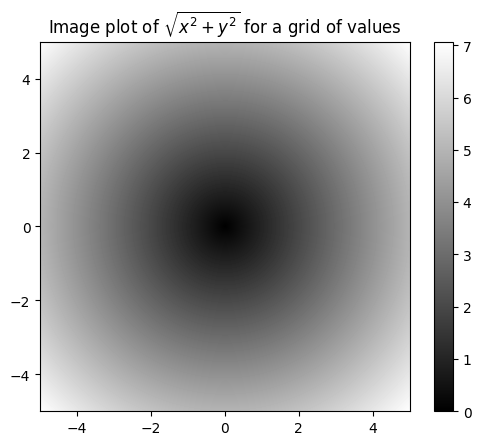

In [10]:
plt.imshow(zs, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title('Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

In [11]:
plt.close('all')

#### 4.4.2 Array Conditional Logic with `np.where()`

In [12]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = xarr + 1
yarr

array([2.1, 2.2, 2.3, 2.4, 2.5])

In [13]:
cond = np.array([True, False, True, True, False])

In [14]:
# Python version to use cond to decide between xarr and yarr
[(x if c else y) for c, x, y in zip(cond, xarr, yarr)]

[1.1000, 2.2000, 1.3000, 1.4000, 2.5000]

In [15]:
# NumPy version
np.where(cond, xarr, yarr)

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [16]:
arr4x4 = np.random.standard_normal((4, 4))
arr4x4

array([[ 2.1004, -2.2168, -1.0168, -0.5985],
       [-1.3344,  0.8398, -0.6727, -0.4175],
       [ 1.2055, -0.8769,  1.2589,  1.1417],
       [ 0.4172,  0.4641,  0.1662,  1.3676]])

In [17]:
np.where(arr4x4 > 0, 1., -1.)

array([[ 1., -1., -1., -1.],
       [-1.,  1., -1., -1.],
       [ 1., -1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [18]:
np.where(arr4x4 > 0, 1., -1.) == np.sign(arr4x4)    # Works for non-zero real values

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [19]:
arr4x4[1, 1] = 0.
arr4x4

array([[ 2.1004, -2.2168, -1.0168, -0.5985],
       [-1.3344,  0.    , -0.6727, -0.4175],
       [ 1.2055, -0.8769,  1.2589,  1.1417],
       [ 0.4172,  0.4641,  0.1662,  1.3676]])

In [20]:
np.where(arr4x4 > 0, 1., -1.) == np.sign(arr4x4)    # The 0. at [1, 1] results in a False there

array([[ True,  True,  True,  True],
       [ True, False,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [21]:
np.where(arr4x4 > 1, 1., arr4x4)    # Recipe to clip the top values

array([[ 1.    , -2.2168, -1.0168, -0.5985],
       [-1.3344,  0.    , -0.6727, -0.4175],
       [ 1.    , -0.8769,  1.    ,  1.    ],
       [ 0.4172,  0.4641,  0.1662,  1.    ]])

#### 4.4.3 Math and Stat Methods `.mean(), .std(), .min(), .cumsum(), np.median()`

Aggregations or reductions.

In [22]:
arr = np.random.standard_normal((3, 5))
arr

array([[-1.0674,  0.8183,  0.6577, -0.4335, -1.3938],
       [-0.3333,  1.7468,  0.1158,  1.4693, -0.5822],
       [ 1.1333,  1.2727, -0.1127,  0.9435,  0.9691]])

In [23]:
arr.mean()

0.3469

In [24]:
arr.std(), arr.var()

(0.9305, 0.8658)

In [25]:
arr.min(), arr.max()

(-1.3938, 1.7468)

In [9]:
# Causes AttributeError: 'numpy.ndarray' object has no attribute 'median'
#arr.median()

AttributeError: 'numpy.ndarray' object has no attribute 'median'

In [26]:
np.median(arr)

0.6577

In [27]:
arr.sum()

5.2035

In [28]:
arr.mean(axis=0)    # Average across or along axis=0

array([-0.0891,  1.2793,  0.2203,  0.6597, -0.3356])

In [29]:
arr.mean(axis=1)

array([-0.2838,  0.4833,  0.8412])

In [30]:
arr

array([[-1.0674,  0.8183,  0.6577, -0.4335, -1.3938],
       [-0.3333,  1.7468,  0.1158,  1.4693, -0.5822],
       [ 1.1333,  1.2727, -0.1127,  0.9435,  0.9691]])

In [31]:
arr.cumsum(axis=0)

array([[-1.0674,  0.8183,  0.6577, -0.4335, -1.3938],
       [-1.4007,  2.5651,  0.7735,  1.0358, -1.976 ],
       [-0.2674,  3.8378,  0.6608,  1.9792, -1.0069]])

In [32]:
arr.cumsum(axis=1)

array([[-1.0674, -0.2491,  0.4086, -0.025 , -1.4188],
       [-0.3333,  1.4135,  1.5293,  2.9986,  2.4164],
       [ 1.1333,  2.406 ,  2.2933,  3.2367,  4.2059]])

#### 4.4.4 Boolean-Array Methods `.sum(), .any(), .all()`

`.sum()` counts True values in an ndarray, since Boolean values are coerced to 1 (True) and 0 (False) in the preceding methods.

In [33]:
arr = np.random.standard_normal(1000)

In [34]:
(arr > 2.5).sum()    # Number of vals > 2.5

6

In [35]:
(arr < -2.5).sum()    # Number of vals < -2.5

8

In [36]:
(arr > 3.0).any()

True

In [37]:
(arr < -3.0).any()

False

In [38]:
arr.all()

True

#### 4.4.5 Sorting

- Sort in place with `.sort()`, similar to Python list function `.sort()`;
- Get a sorted copy with `np.sort()`, similar to Python function `sorted()`;
- Sort a table with 1 or more cols with pandas.

In [39]:
arr1 = np.random.standard_normal(5)
arr1

array([-0.6646,  0.8593, -0.0999,  0.9276,  0.3814])

In [44]:
arr1.sort?

Docstring:
a.sort(axis=-1, kind=None, order=None)

Sort an array in-place. Refer to `numpy.sort` for full documentation.

Parameters
----------
axis : int, optional
    Axis along which to sort. Default is -1, which means sort along the
    last axis.
kind : {'quicksort', 'mergesort', 'heapsort', 'stable'}, optional
    Sorting algorithm. The default is 'quicksort'. Note that both 'stable'
    and 'mergesort' use timsort under the covers and, in general, the
    actual implementation will vary with datatype. The 'mergesort' option
    is retained for backwards compatibility.

    .. versionchanged:: 1.15.0
       The 'stable' option was added.

order : str or list of str, optional
    When `a` is an array with fields defined, this argument specifies
    which fields to compare first, second, etc.  A single field can
    be specified as a string, and not all fields need be specified,
    but unspecified fields will still be used, in the order in which
    they come up in the dtype, to b

In [40]:
arr1.sort()    # Sort in place
arr1

array([-0.6646, -0.0999,  0.3814,  0.8593,  0.9276])

In [41]:
arr2 = np.random.standard_normal((5, 3))
arr2

array([[ 0.7095,  1.5771,  0.4185],
       [-0.4195,  0.0607,  1.0989],
       [-0.7808, -0.7433, -0.9448],
       [ 1.1775,  0.4649,  1.1411],
       [-0.8092,  0.9955,  0.348 ]])

In [45]:
arr2.sort()    # Sort in place. Default axis is -1, which means sort along the last axis.
arr2

array([[ 0.4185,  0.7095,  1.5771],
       [-0.4195,  0.0607,  1.0989],
       [-0.9448, -0.7808, -0.7433],
       [ 0.4649,  1.1411,  1.1775],
       [-0.8092,  0.348 ,  0.9955]])

In [46]:
arr3 = np.random.standard_normal((2, 3))
arr3

array([[ 0.7401,  0.3547, -1.3088],
       [-0.0742, -0.5541, -0.1825]])

In [47]:
np.sort(arr3, axis=1)    # Get a sorted copy, but leave arr3 unchanged

array([[-1.3088,  0.3547,  0.7401],
       [-0.5541, -0.1825, -0.0742]])

In [48]:
arr3    # Unchanged

array([[ 0.7401,  0.3547, -1.3088],
       [-0.0742, -0.5541, -0.1825]])

In [49]:
arr3.sort(axis=1)
arr3

array([[-1.3088,  0.3547,  0.7401],
       [-0.5541, -0.1825, -0.0742]])

In [50]:
arr3.sort(axis=0)
arr3

array([[-1.3088, -0.1825, -0.0742],
       [-0.5541,  0.3547,  0.7401]])

#### 4.4.6 Set Logic: `np.unique()` and `np.isin()`

In [51]:
names = np.array(['Bob', 'Wil', 'Joe', 'Bob', 'Wil', 'Joe', 'Joe'])

In [53]:
np.unique(names)    # NumPy version

array(['Bob', 'Joe', 'Wil'], dtype='<U3')

In [54]:
sorted(set(names))    # Python version, typically slower and returning a list

['Bob', 'Joe', 'Wil']

In [55]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
ints

array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [56]:
np.unique(ints)    # NumPy version

array([1, 2, 3, 4])

In [57]:
sorted(set(ints))    # Python version

[1, 2, 3, 4]

In [58]:
evens = np.array([2, 4])
evens

array([2, 4])

In [59]:
ints

array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [64]:
np.in1d(ints, evens)    # Recommend using :func:`isin` instead of `in1d` for new code.

array([False, False, False,  True,  True, False, False,  True,  True])

In [61]:
np.in1d?

Signature: np.in1d(ar1, ar2, assume_unique=False, invert=False)
Docstring:
Test whether each element of a 1-D array is also present in a second array.

Returns a boolean array the same length as `ar1` that is True
where an element of `ar1` is in `ar2` and False otherwise.

We recommend using :func:`isin` instead of `in1d` for new code.

Parameters
----------
ar1 : (M,) array_like
    Input array.
ar2 : array_like
    The values against which to test each value of `ar1`.
assume_unique : bool, optional
    If True, the input arrays are both assumed to be unique, which
    can speed up the calculation.  Default is False.
invert : bool, optional
    If True, the values in the returned array are inverted (that is,
    False where an element of `ar1` is in `ar2` and True otherwise).
    Default is False. ``np.in1d(a, b, invert=True)`` is equivalent
    to (but is faster than) ``np.invert(in1d(a, b))``.

    .. versionadded:: 1.8.0

Returns
-------
in1d : (M,) ndarray, bool
    The values `ar

In [62]:
np.isin?

Signature: np.isin(element, test_elements, assume_unique=False, invert=False)
Docstring:
Calculates ``element in test_elements``, broadcasting over `element` only.
Returns a boolean array of the same shape as `element` that is True
where an element of `element` is in `test_elements` and False otherwise.

Parameters
----------
element : array_like
    Input array.
test_elements : array_like
    The values against which to test each value of `element`.
    This argument is flattened if it is an array or array_like.
    See notes for behavior with non-array-like parameters.
assume_unique : bool, optional
    If True, the input arrays are both assumed to be unique, which
    can speed up the calculation.  Default is False.
invert : bool, optional
    If True, the values in the returned array are inverted, as if
    calculating `element not in test_elements`. Default is False.
    ``np.isin(a, b, invert=True)`` is equivalent to (but faster
    than) ``np.invert(np.isin(a, b))``.

Returns
--

In [63]:
np.isin(ints, evens)

array([False, False, False,  True,  True, False, False,  True,  True])

### 4.5 File IO with Arrays

Saving NumPy binary file formats:
1. Workhorse funcs: `np.save()` and `np.load()`, file extension `.npy`;
2. Save multiplce uncompressed arrays with `np.savez()`, file extension `.npz`;
3. Save multiplce compressed arrays with `np.savez_compressed()`, file extension `.npz`.

In [5]:
arr = np.arange(17)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [6]:
csum = arr.cumsum()
csum

array([  0,   1,   3,   6,  10,  15,  21,  28,  36,  45,  55,  66,  78,
        91, 105, 120, 136])

In [7]:
np.save('cumsum_arr', csum)

In [8]:
np.load('cumsum_arr.npy')

array([  0,   1,   3,   6,  10,  15,  21,  28,  36,  45,  55,  66,  78,
        91, 105, 120, 136])

In [9]:
np.savez('archive_2arr.npz', arr=arr, csum=csum)

In [10]:
arch = np.load('archive_2arr.npz')

In [11]:
arch['arr']

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [12]:
arch['csum']

array([  0,   1,   3,   6,  10,  15,  21,  28,  36,  45,  55,  66,  78,
        91, 105, 120, 136])

In [13]:
np.savez_compressed('compress_2arr.npz', arr=arr, csum=csum)

In [14]:
comp = np.load('compress_2arr.npz')

In [15]:
comp['arr']

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [16]:
comp['csum']

array([  0,   1,   3,   6,  10,  15,  21,  28,  36,  45,  55,  66,  78,
        91, 105, 120, 136])

### 4.6 Linear Algebra

- Common np.linalg funcs:
    - `diag, dot, trace, det, eig, inv, pinv, qr, svd, solve, lstsq`

In [17]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [18]:
y = np.array([[6., 23], [-1, 7], [8, 9]])
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [19]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [20]:
np.dot(x, y)    # Equivalent to the x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [21]:
x @ y

array([[ 28.,  64.],
       [ 67., 181.]])

In [22]:
np.ones(3)

array([1., 1., 1.])

In [23]:
x @ np.ones(3)

array([ 6., 15.])

In [24]:
np.ones((3, 2))

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [25]:
x @ np.ones((3, 2))

array([[ 6.,  6.],
       [15., 15.]])

In [26]:
from numpy.linalg import inv, qr

In [27]:
X = np.random.standard_normal((5, 5))
X

array([[ 0.593 ,  0.8031, -0.0211, -1.0765,  0.2463],
       [-0.8913, -2.0003, -0.8765, -0.504 ,  0.902 ],
       [-1.8487, -0.2719, -1.5271,  0.8607,  0.7506],
       [-1.765 ,  0.3411,  1.011 , -0.1344, -1.8343],
       [-0.4079,  0.8805,  0.6149,  1.9851, -0.356 ]])

In [28]:
Y = X.T @ X
Y

array([[ 7.8454,  1.8007,  1.5566, -2.3528,  1.3372],
       [ 1.8007,  5.6115,  3.0377,  1.6116, -2.7496],
       [ 1.5566,  3.0377,  4.5008,  0.235 , -4.0154],
       [-2.3528,  1.6116,  0.235 ,  6.1123, -0.5339],
       [ 1.3372, -2.7496, -4.0154, -0.5339,  4.9291]])

In [29]:
Yi = inv(Y)
Yi

array([[ 1.2918, -0.5049, -2.3702,  0.5024, -2.5086],
       [-0.5049,  0.5085,  0.7125, -0.2709,  0.9717],
       [-2.3702,  0.7125,  5.3135, -0.8435,  5.2776],
       [ 0.5024, -0.2709, -0.8435,  0.3793, -0.9335],
       [-2.5086,  0.9717,  5.2776, -0.9335,  5.6237]])

In [30]:
Y @ Yi

array([[ 1.0000e+00,  4.8736e-16, -6.5196e-16, -3.0338e-16, -3.0983e-15],
       [ 6.6264e-16,  1.0000e+00,  2.2945e-15, -1.1425e-17, -4.8754e-15],
       [ 1.7613e-15,  5.8388e-16,  1.0000e+00, -2.6007e-16, -1.5765e-15],
       [-7.7776e-16,  2.5413e-16,  1.3621e-15,  1.0000e+00,  5.6853e-16],
       [-2.7881e-15, -1.2436e-16,  1.9017e-15, -1.4890e-15,  1.0000e+00]])

In [31]:
Xi = inv(X)
Xi

array([[-0.7481, -0.58  , -0.082 , -0.3147, -0.5386],
       [ 0.6249, -0.1785,  0.2034,  0.039 ,  0.208 ],
       [ 1.2623,  1.2159, -0.6905,  0.231 ,  1.3082],
       [-0.5401, -0.1997,  0.0587, -0.1706,  0.1232],
       [ 1.5713,  1.2097, -0.2682, -0.0953,  1.269 ]])

In [32]:
Xi @ X

array([[ 1.0000e+00, -3.6865e-17,  2.6263e-17, -3.3917e-16, -3.5714e-17],
       [ 9.8437e-19,  1.0000e+00,  7.2510e-17, -1.2204e-16,  1.6258e-17],
       [ 2.8909e-16, -3.4271e-17,  1.0000e+00,  2.6488e-17,  2.9121e-17],
       [-9.9635e-18,  6.0048e-17,  2.5607e-17,  1.0000e+00, -6.7844e-17],
       [ 1.3688e-16, -2.8301e-16,  9.7736e-17,  2.6568e-19,  1.0000e+00]])

### 4.7 Example: Random Walks

#### 4.7.1 Pure Python Way

In [4]:
import random
position = 0
walk = [position]
n_steps = 1000
for _ in range(n_steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

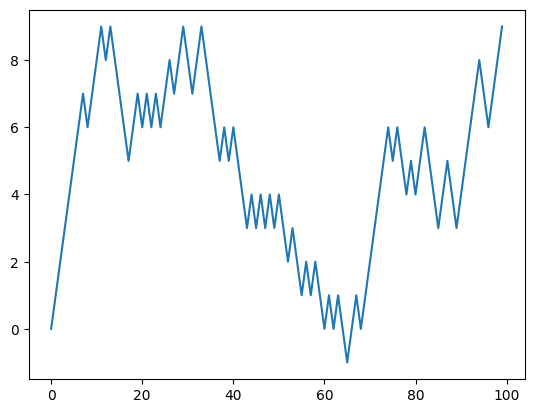

In [5]:
plt.plot(walk[:100])

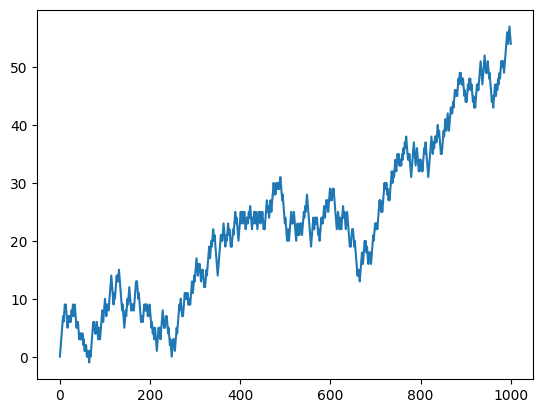

In [6]:
plt.plot(walk)

#### 4.7.2 NumPy Way

In [7]:
n_steps = 1000
rng = np.random.default_rng(seed=12345)
draws = rng.integers(0, 2, size=n_steps)
steps = np.where(draws == 0, -1, 1)
walk = steps.cumsum()

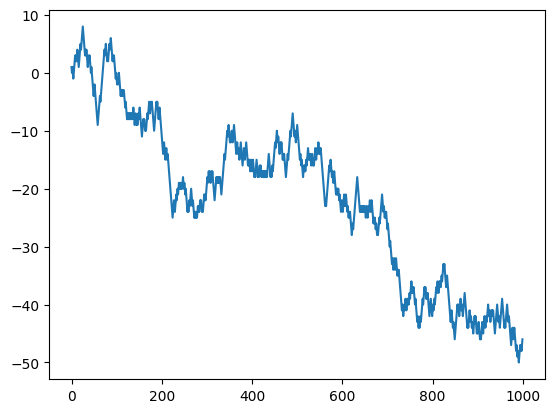

In [8]:
plt.plot(walk)

In [9]:
walk.min(), walk.max()

(-50, 8)

In [10]:
(np.abs(walk) >= 10).argmax()

155

- Two points on the above cess:
    1. (np.abs(walk) >= 10) turns each elements into T or F, which are then coerced into 1 or 0;
    2. Among the multiple 1's, .argmax() returns the first's index. From docs of np.argmax():
        - Notes: In case of multiple occurrences of the maximum values, the indices corresponding to the first occurrence are returned.

In [40]:
np.argmax?

Signature: np.argmax(a, axis=None, out=None, *, keepdims=<no value>)
Docstring:
Returns the indices of the maximum values along an axis.

Parameters
----------
a : array_like
    Input array.
axis : int, optional
    By default, the index is into the flattened array, otherwise
    along the specified axis.
out : array, optional
    If provided, the result will be inserted into this array. It should
    be of the appropriate shape and dtype.
keepdims : bool, optional
    If this is set to True, the axes which are reduced are left
    in the result as dimensions with size one. With this option,
    the result will broadcast correctly against the array.

    .. versionadded:: 1.22.0

Returns
-------
index_array : ndarray of ints
    Array of indices into the array. It has the same shape as `a.shape`
    with the dimension along `axis` removed. If `keepdims` is set to True,
    then the size of `axis` will be 1 with the resulting array having same
    shape as `a.shape`.

See Also
--------

#### 4.7.3 Simulating Many Random Walks at Once

In [11]:
n_walks = 5000
n_steps = 1000
rng = np.random.default_rng(seed=12345)
draws = rng.integers(0, 2, size=(n_walks, n_steps))    # 0 or 1; each row is a walk
steps = np.where(draws > 0, 1, -1)    # keep the 1's and change the 0's to -1's
walks = steps.cumsum(axis=1)    # Each row is a walk

In [12]:
walks

array([[  1,   0,   1, ..., -48, -47, -46],
       [  1,   2,   3, ...,  22,  23,  22],
       [  1,   0,  -1, ..., -50, -49, -48],
       ...,
       [  1,   2,   1, ...,  44,  43,  44],
       [ -1,  -2,  -1, ..., -10,  -9, -10],
       [ -1,  -2,  -3, ...,   8,   9,   8]])

In [13]:
walks.ndim

2

In [14]:
walks.shape

(5000, 1000)

In [15]:
walks.min(), walks.max()

(-120, 114)

In [16]:
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30

array([ True, False,  True, ...,  True,  True, False])

In [17]:
hits30.shape

(5000,)

In [18]:
hits30.sum()    # Number of walks that hit 30 or -30

3395

In [19]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times

array([705, 201, 491, ..., 149, 219, 259], dtype=int64)

In [20]:
len(crossing_times)

3395

In [21]:
crossing_times.mean()

500.6183

#### 4.7.4 Simulating Random Walks My Way

In [25]:
n_walks = 5000
n_steps = 1000
rng = np.random.default_rng(seed=12345)

In [26]:
# (rng.integers() * 2 - 1) converts 0's and 1's into -1's and 1's, suitable for the random walk.
# This one-liner is more compact, but less readable.
my_walks = (rng.integers(0, 2, size=(n_walks, n_steps)) * 2 - 1).cumsum(axis=1)
my_walks

array([[  1,   0,   1, ..., -48, -47, -46],
       [  1,   2,   3, ...,  22,  23,  22],
       [  1,   0,  -1, ..., -50, -49, -48],
       ...,
       [  1,   2,   1, ...,  44,  43,  44],
       [ -1,  -2,  -1, ..., -10,  -9, -10],
       [ -1,  -2,  -3, ...,   8,   9,   8]], dtype=int64)

In [27]:
my_walks.min(), my_walks.max()

(-120, 114)

In [28]:
((np.abs(my_walks) >= 30)
 .any(axis=1)
 .sum()    # Count of walks with abs() >= 30 at any time
)

3395

In [29]:
((np.abs(walks[hits30]) >= 30)
 .argmax(axis=1)    # Corssing times
 .mean()
)

500.6183